In [1]:
import requests
import pandas as pd


In [2]:
def Get_Data(date):
    url = f"https://webapi.niftytrader.in/webapi/Resource/fii-cash-month?Date={date}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
    else:
        print(f"Error: Unable to fetch data. Status code: {response.status_code}")
        data = None
    maindata = data['resultData']['data']
    df = pd.DataFrame(maindata)
    df['created_at'] = df['created_at'].apply(lambda x: x.split('T')[0])
    df = df.drop_duplicates()
    return df
    

In [3]:
from datetime import datetime, timedelta

def get_current_and_previous_months():
    today_date = datetime.now()
    current_month = today_date.strftime("%Y-%m")
    first_day_of_previous_month = (today_date.replace(day=1) - timedelta(days=1)).replace(day=1)
    previous_month = first_day_of_previous_month.strftime("%Y-%m")
    return [current_month, previous_month]
    
result = get_current_and_previous_months()

df = pd.DataFrame()
for date in result:
    df = pd.concat([df, Get_Data(date)], ignore_index=True)


df['created_at'] = pd.to_datetime(df['created_at']).dt.date
grouped_df = df.groupby(['created_at', 'category'])['net_value'].sum().reset_index()
pivot_df = grouped_df.pivot(index='created_at', columns='category', values='net_value').reset_index()
pivot_df = pivot_df.rename(columns={'FII/FPI': 'FII_Market_cap', 'DII': 'DII_Market_cap'})
pivot_df['Total_Market_cap'] = pivot_df['FII_Market_cap'] + pivot_df['DII_Market_cap']
pivot_df = pivot_df.fillna(0).tail(20)
pivot_df

category,created_at,DII_Market_cap,FII_Market_cap,Total_Market_cap
20,2023-12-01,1448.08,1589.61,3037.69
21,2023-12-04,4797.15,2073.21,6870.36
22,2023-12-05,-1399.18,5223.51,3824.33
23,2023-12-06,1372.18,-79.88,1292.30
24,2023-12-07,-9.66,-1564.03,-1573.69
25,2023-12-08,-434.02,3632.30,3198.28
26,2023-12-11,-1032.92,1261.13,228.21
27,2023-12-12,1923.32,76.86,2000.18
28,2023-12-13,-958.49,4710.86,3752.37
29,2023-12-14,553.17,3570.07,4123.24


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

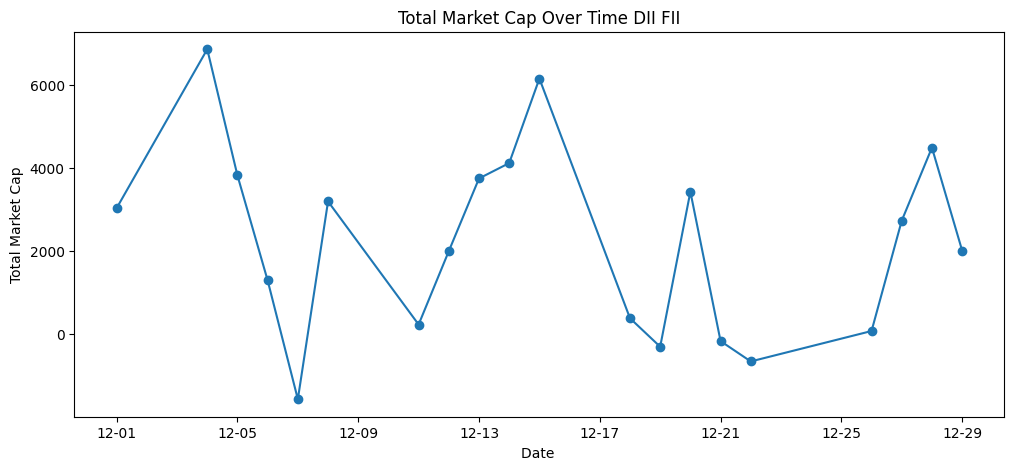

In [5]:
pivot_df['created_at'] = pd.to_datetime(pivot_df['created_at'])

# Plot using plt.plot with date formatting
plt.figure(figsize=(12, 5))
plt.plot(pivot_df['created_at'], pivot_df['Total_Market_cap'], marker='o')
date_format = DateFormatter("%m-%d")
plt.gca().xaxis.set_major_formatter(date_format)

plt.title('Total Market Cap Over Time DII FII')
plt.xlabel('Date ')
plt.ylabel('Total Market Cap')

# Show the plot
plt.show()
